### Bank Churn Model(Logistic Regression)

In [2]:
#Standard libraries for data analysis: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Using pandas set option method to see all the columns in dataset.

pd.set_option('display.max_columns', None)

In [4]:
#Importing and Loading the data file.

df=pd.read_csv("D:/Python/BCM.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Dropping below feature as they are not significant in our analysis. 

df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
#Checking for null values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Above, we found that there are no null values in the data set.

In [7]:
#Dropping the duplicate value if any.

df.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Performing EDA

Creating seperate list of  catagorical and continuous variable

In [8]:
discrete_feature=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']

In [9]:
discrete_feature

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [10]:
continuous_feature=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [11]:
continuous_feature

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

###### Plotting Graphs for both the continuous and discrete features

First, working with discrete features

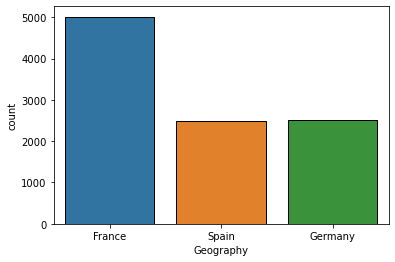

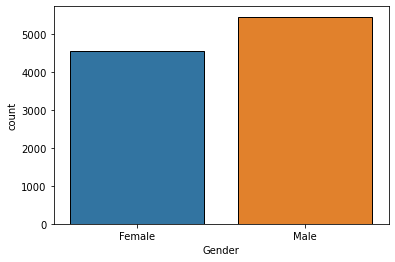

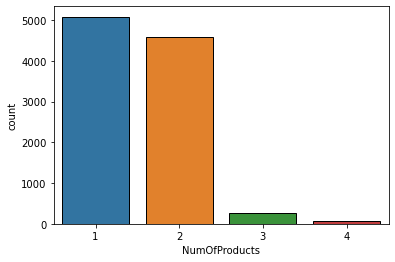

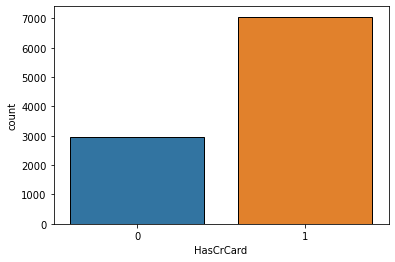

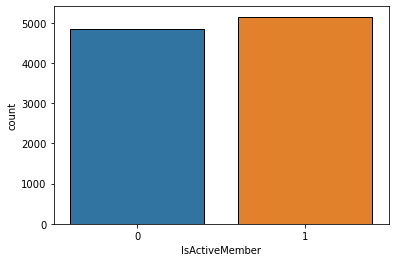

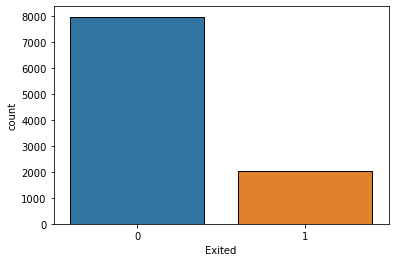

In [13]:
# Countplot

for feature in discrete_feature:
    sns.countplot(x=feature,data=df,edgecolor="Black")
    plt.show()

From the above graphs we can deduce that:-

    1. The bank has most of its customer from France among all the countries present in the dataset.
    2. Most of the customers are males as compared to females.
    3. Most customers have opted for 1 or 2 products offered by the bank.
    4. Most of the customer has not exited the bank.

Plotting graphs for continuous features

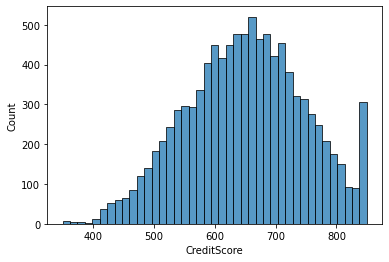

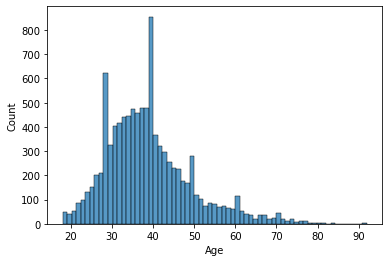

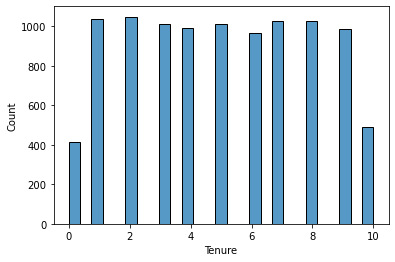

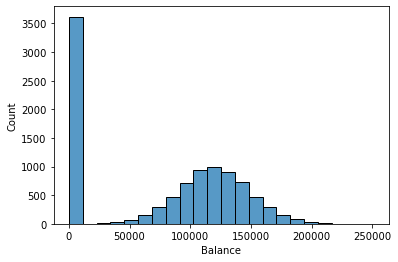

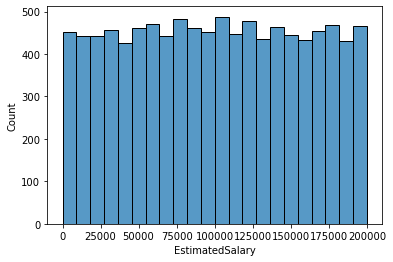

In [14]:
for feature in continuous_feature:
    sns.histplot(data=df,x=feature,edgecolor='Black')
    plt.show()

From the above graphs we can deduce that:-

 1. Max customer have their credit score b/w 600-700 range
 2. The bank has max. customer b/w the age of 30 to 40.
 3. Number of customers having 0-1 year and 9-10year tenure are less, whereas there are approx 900 customers b/w the range 1 to 9years who have opend the account with the bank.
 4. Almost 3500 customer has there account inactive maintaining a zero balance account. While there are also on an average 1000 customer who have 100k-150k inn their account.
 5. The no. of customers are almost equal for every salary range whichh approx 450

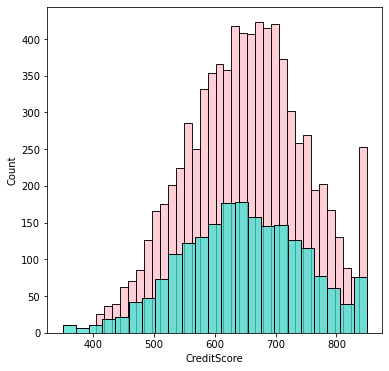

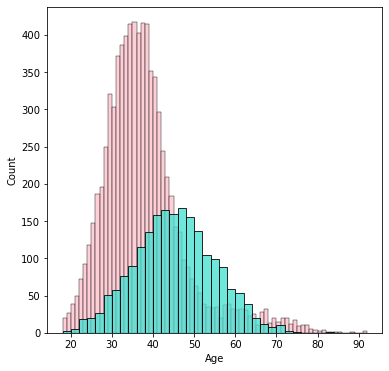

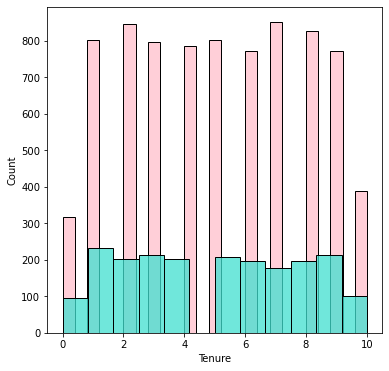

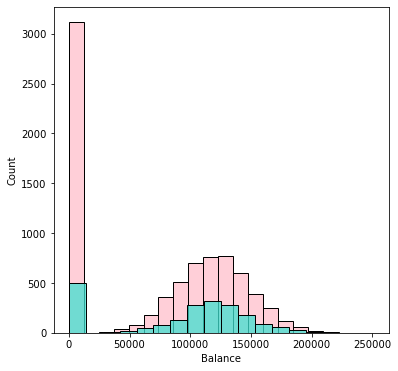

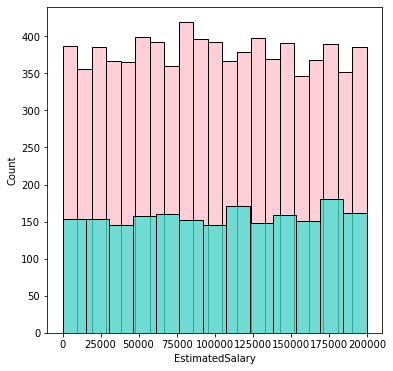

In [15]:
# histogram
for feature in continuous_feature:
    
    plt.figure(figsize=(6,6))
    sns.histplot(x=df[feature][df['Exited']==0],edgecolor='Black',color='pink')
    sns.histplot(x=df[feature][df['Exited']==1],edgecolor='Black',color='turquoise')
    plt.show()


From the above graphical representation we can see that 'Tenure','EstimatedSalary','HasCrCard' does not have any relevance with the dependent variable.Hence, removing these features for better decison making

In [12]:
df=df.drop(['Tenure','EstimatedSalary','HasCrCard'],axis=1)

In [13]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0
9996,516,France,Male,35,57369.61,1,1,0
9997,709,France,Female,36,0.00,1,1,1
9998,772,Germany,Male,42,75075.31,2,0,1


# Preprocessing

###### Splitting the independent and dependent variable

In [14]:
x=df.drop(['Exited'],axis=1)

In [19]:
x

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0
9996,516,France,Male,35,57369.61,1,1
9997,709,France,Female,36,0.00,1,1
9998,772,Germany,Male,42,75075.31,2,0


In [15]:
y=df.Exited

In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
## sklearn modules for data preprocessing:

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
encoder=ColumnTransformer([('one',OneHotEncoder(),[1,2]),('sc',StandardScaler(),[0,3,4,5])],remainder='passthrough')

Using OneHotEncoder for changing the categorical variable 'Geography' and 'Gender' numerical data and standard scaler resizing the data to apply algorithms and make predictions respectively, because we cannot apply algorithms on string values.

In [18]:
# Passing dataframe 'x' to transform the data .
newdata=encoder.fit_transform(x)

In [19]:
type(newdata)

numpy.ndarray

In [20]:
newdata

array([[ 1.        ,  0.        ,  0.        , ..., -1.22584767,
        -0.91158349,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.11735002,
        -0.91158349,  1.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.33305335,
         2.52705662,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.22584767,
        -0.91158349,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.02260751,
         0.80773656,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.85996499,
        -0.91158349,  0.        ]])

In [21]:
#Converting the transformend data into a dataframe to work on it.

z=pd.DataFrame(newdata)

In [22]:
z

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,1.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,1.0
1,0.0,0.0,1.0,1.0,0.0,-0.440036,0.198164,0.117350,-0.911583,1.0
2,1.0,0.0,0.0,1.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0
3,1.0,0.0,0.0,1.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0
4,0.0,0.0,1.0,1.0,0.0,2.063884,0.388871,0.785728,-0.911583,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,1.246488,0.007457,-1.225848,0.807737,0.0
9996,1.0,0.0,0.0,0.0,1.0,-1.391939,-0.373958,-0.306379,-0.911583,1.0
9997,1.0,0.0,0.0,1.0,0.0,0.604988,-0.278604,-1.225848,-0.911583,1.0
9998,0.0,1.0,0.0,0.0,1.0,1.256835,0.293517,-0.022608,0.807737,0.0


###### Splitting the data

In [24]:
#Now,splitting the data into train and test through sklearn library
#sklearn modules for Model Selection:

from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(z,y,train_size=.85)

Checking the shape of spitted data

In [25]:
print(xtrain.shape)
print(ytrain.shape)

(8500, 10)
(8500,)


In [26]:
print(xtest.shape)
print(ytest.shape)

(1500, 10)
(1500,)


#####  Developing the model to make prediction

In [27]:
#Using logistic Regression to develop the model

from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression() #Using an object to call the logistic regression class.

In [29]:
# Passing the x,y train data into the model

model.fit(xtrain,ytrain)

LogisticRegression()

###### Making Predictions

In [30]:
# Making prediction based on the developed model using 'xtest' data

ypred=model.predict(xtest)

ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

###### Checking for the accuracy of the model 

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
print(accuracy_score(ytest,ypred))

0.8026666666666666


In [33]:
from sklearn import metrics

In [34]:
print(metrics.confusion_matrix(ytest,ypred))

[[1136   45]
 [ 251   68]]


In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1181
           1       0.60      0.21      0.31       319

    accuracy                           0.80      1500
   macro avg       0.71      0.59      0.60      1500
weighted avg       0.77      0.80      0.76      1500



From the above result and the accuracy report we have generated giving us the same value of the model accuracy.With the help of both the values we can say that the model is 81  percent accurate in classifying the dependent variable among the exit and non-exited customer.

In [36]:
import joblib

In [37]:
joblib.dump(model,'bca.pkl')

['bca.pkl']

In [41]:
bca=joblib.load('bca.pkl')

In [44]:
test1=[[0.0,1.0,0.0,0.0,1.0,-0.3862,0.31256,-0.1173,1.8759,0.0]]

In [45]:
result=bca.predict(test1)

In [46]:
result

array([0], dtype=int64)